# Виконав Лабунський Петро

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph(img, name):
    return plt.imshow(img, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title(str(name))

# Завдання
## 1. Методами порогової та морфологічної обробки відобразити тільки контури циферблату
 Завантажити зображення "digit.jpg" директорії "./examples/"

### Зчитуємо вихідне зображення

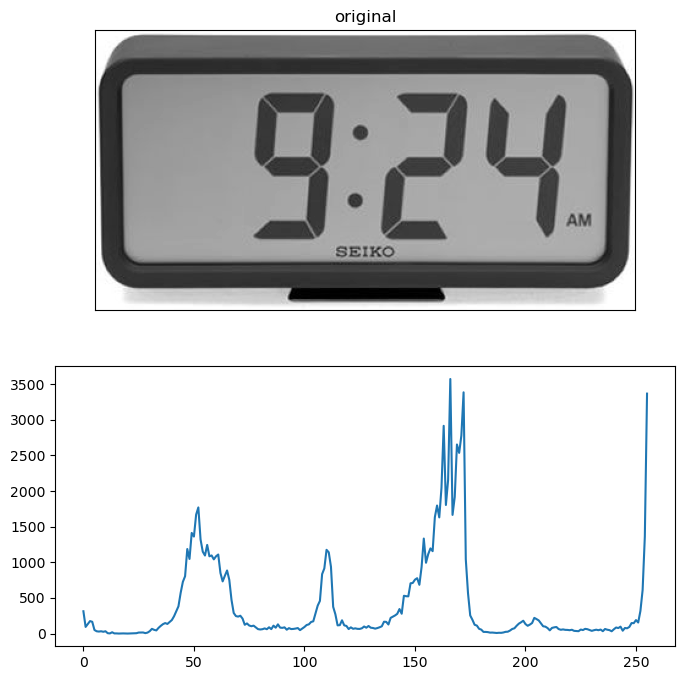

In [3]:
img_1 = cv2.imread("input/digit.jpg", cv2.IMREAD_GRAYSCALE)

hist_1 = cv2.calcHist([img_1], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 8))
plt.subplot(211), graph(img_1,'original')
plt.subplot(212), plt.plot(hist_1)
plt.show();

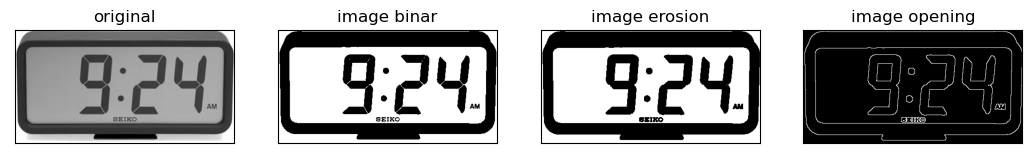

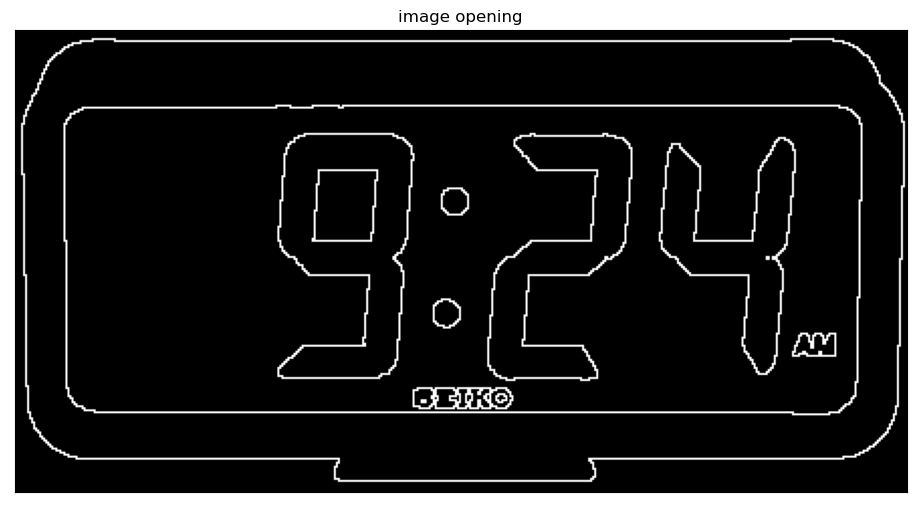

In [4]:
threshold = 125
    
max_value = 255
min_value = 0

img_binar_1 = img_1.copy()
for row in range(img_1.shape[0]):
    for col in range(img_1.shape[1]):
        if (img_1[row][col]) > threshold:
            img_binar_1[row][col] = max_value
        else:
            img_binar_1[row][col] = min_value
n = ([2,2])       
kernel_1 = np.ones(n, np.uint8)
img_erosion_1 = cv2.erode(img_binar_1,kernel_1)
img_opening_1 = cv2.morphologyEx(img_erosion_1, cv2.MORPH_GRADIENT, kernel_1)
    
plt.figure(figsize=(13, 3))
plt.subplot(141), graph(img_1, 'original')
plt.subplot(142), graph(img_binar_1, 'image binar')
plt.subplot(143), graph(img_erosion_1, 'image erosion')
plt.subplot(144), graph(img_opening_1, 'image opening')

plt.figure(figsize=(13, 6))
graph(img_opening_1, 'image opening')
plt.show();

## 2. Методами порогової та морфологічної обробки відобразити границі баскетбольного поля
 Завантажити зображення "basketball.jpg" директорії "./examples/"

### Зчитуємо вихідне зображення

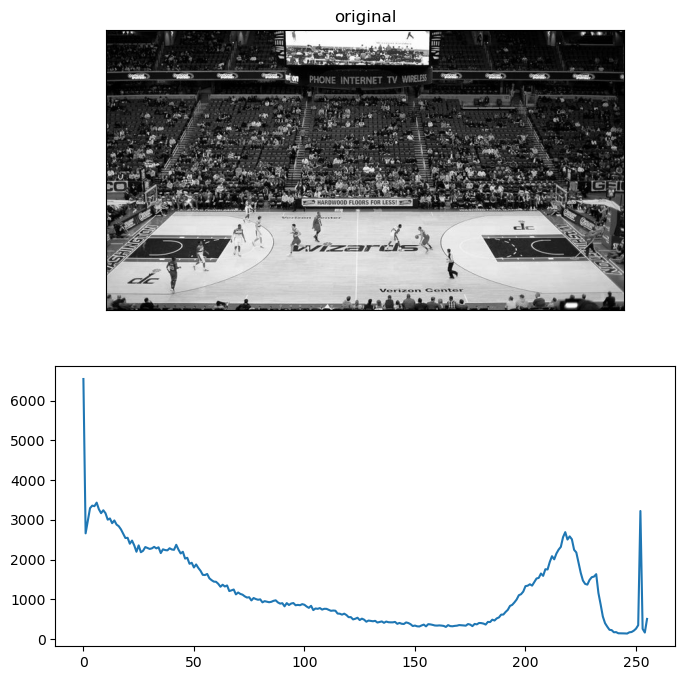

In [5]:
img_2 = cv2.imread("input/basketball.jpg", cv2.IMREAD_GRAYSCALE)

hist_2 = cv2.calcHist([img_2], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 8))
plt.subplot(211), graph(img_2, 'original')
plt.subplot(212), plt.plot(hist_2)
plt.show();

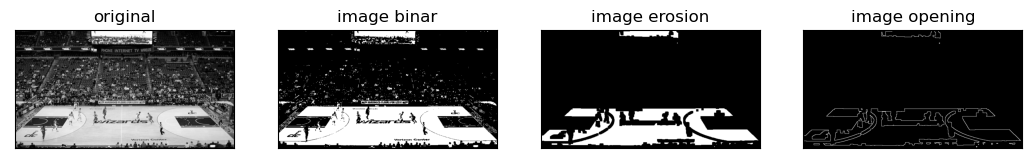

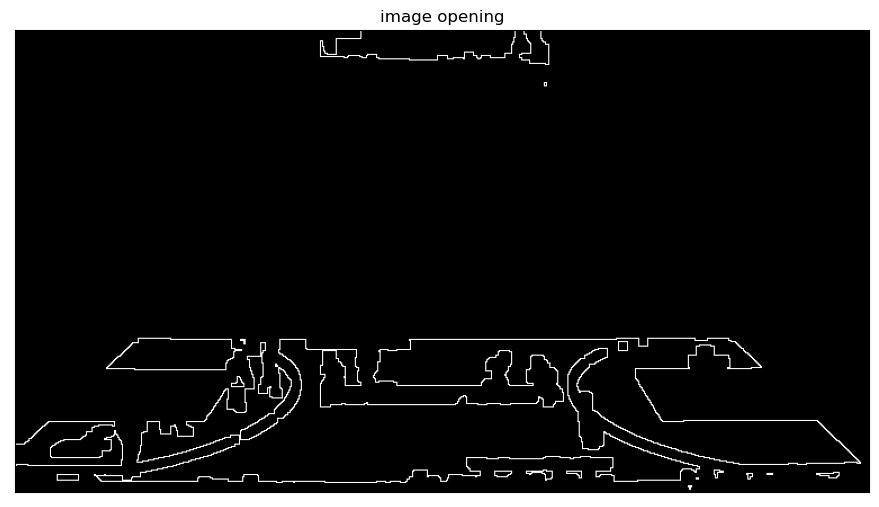

In [6]:
threshold = 170
    
max_value = 255
min_value = 0

img_binar_2 = img_2.copy()
for row in range(img_2.shape[0]):
    for col in range(img_2.shape[1]):
        if (img_2[row][col]) > threshold:
            img_binar_2[row][col] = max_value
        else:
            img_binar_2[row][col] = min_value
            
n = ([2,2])       
kernel = np.ones(n, np.uint8)
img_erosion_2 = cv2.erode(img_binar_2,kernel,iterations = 7)
img_opening_2 = cv2.morphologyEx(img_erosion_2, cv2.MORPH_GRADIENT, kernel)
    
plt.figure(figsize=(13, 3))
plt.subplot(141), graph(img_2, 'original')
plt.subplot(142), graph(img_binar_2, 'image binar')
plt.subplot(143), graph(img_erosion_2, 'image erosion')
plt.subplot(144), graph(img_opening_2, 'image opening')

plt.figure(figsize=(13, 6))
graph(img_opening_2, 'image opening')
plt.show()

## Додаткове завдання
### 1. На основі лабораторної работи Draw_OpenCV обвести контури знайдених об'єктів


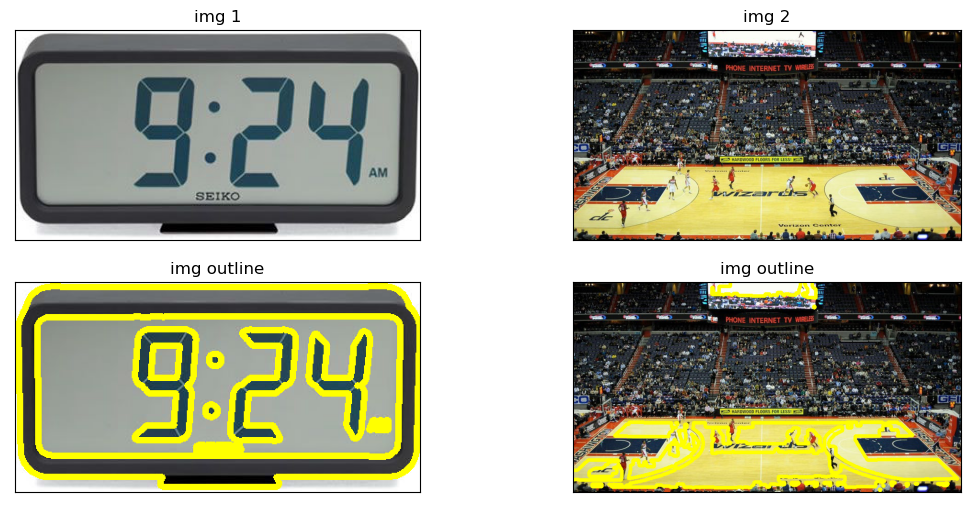

In [7]:
im1 = cv2.imread('input/digit.jpg')
im2 = cv2.imread('input/basketball.jpg')

red = ([0,255,255])
line = 5

contours1 = cv2.findContours(img_opening_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]
contours2 = cv2.findContours(img_opening_2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]


outline1 = cv2.drawContours(im1, contours1, -1, red, line)
outline2 = cv2.drawContours(im2, contours2, -1, red, line)

plt.figure(figsize=(13, 6))
plt.subplot(221), graph(cv2.cvtColor(cv2.imread('input/digit.jpg'), cv2.COLOR_BGR2RGB),"img 1")
plt.subplot(222), graph(cv2.cvtColor(cv2.imread('input/basketball.jpg'), cv2.COLOR_BGR2RGB),"img 2")
plt.subplot(223), graph((cv2.cvtColor(outline1, cv2.COLOR_BGR2RGB)),"img outline")
plt.subplot(224), graph((cv2.cvtColor(outline2, cv2.COLOR_BGR2RGB)),"img outline")

plt.show()

### 2. Визначити область зображення на якій зображений QR-код - x, y, ширина, висота. Відобразити баундинг бокс.

Завантажити зображення "frame1.jpg" директорії "./examples/". Приклад зображення та результату наведений нижче.

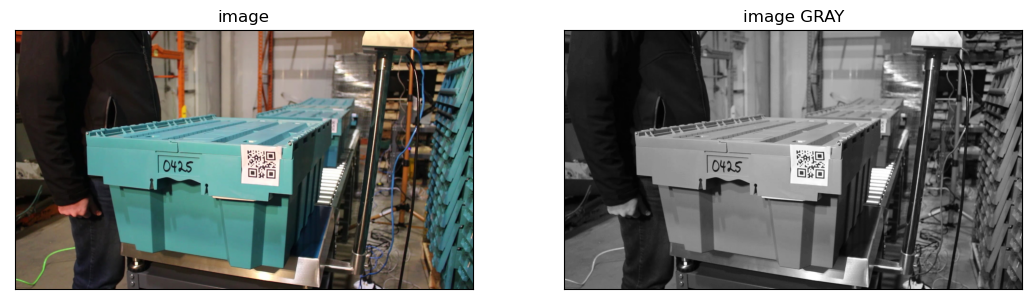

In [8]:
image = cv2.cvtColor(cv2.imread('input/frame1.jpg'), cv2.COLOR_BGR2RGB)
image_GRAY = cv2.imread('input/frame1.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(13, 6))
plt.subplot(121), graph(image, "image")
plt.subplot(122), graph(image_GRAY, "image GRAY")
plt.show()

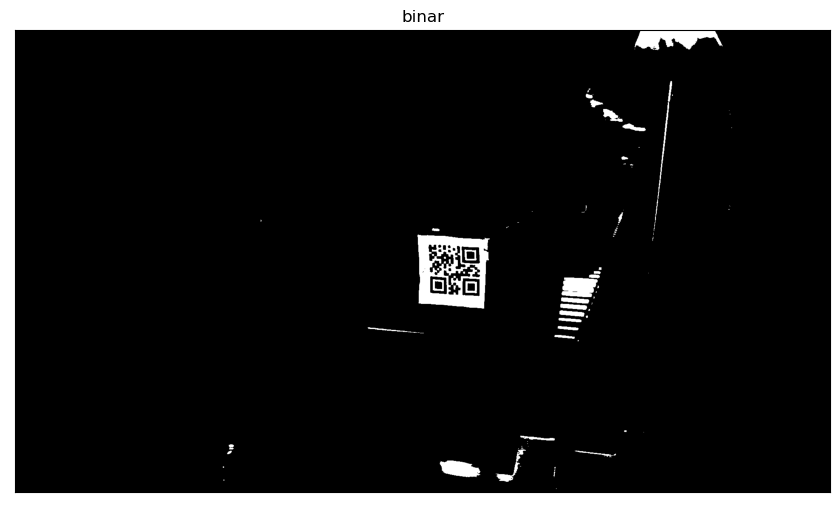

In [9]:
threshold = 230
max_val = 255

thresh_bin = cv2.threshold(image_GRAY, threshold, max_val, cv2.THRESH_BINARY)[1]

plt.figure(figsize=(13, 6))
graph(thresh_bin, "binar")
plt.show()

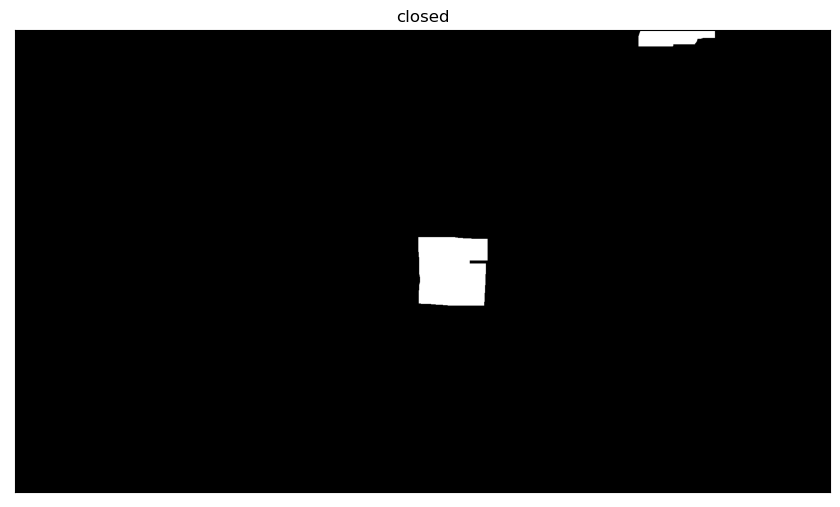

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh_bin, cv2.MORPH_CLOSE, kernel)

closed = cv2.erode(closed, kernel, iterations = 4)
closed = cv2.dilate(closed, kernel, iterations = 4)

plt.figure(figsize=(13, 6))
graph(closed, "closed")
plt.show()

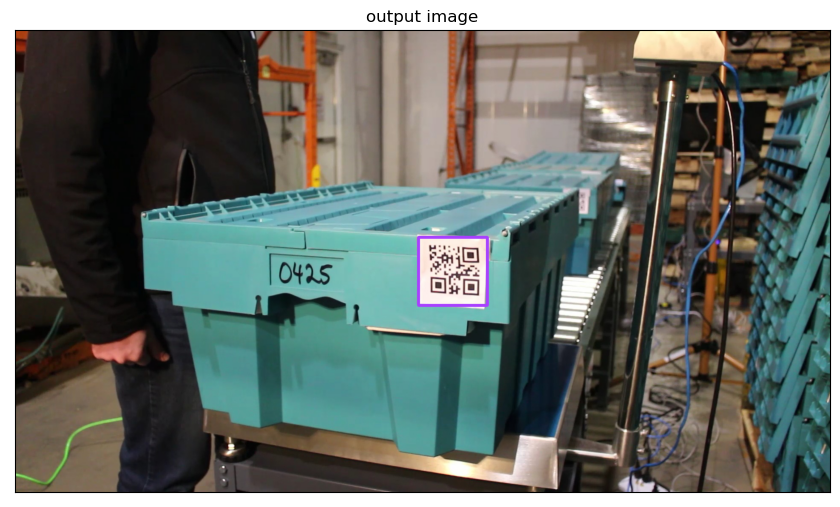

cords: [[ 949  489]
 [1111  489]
 [1111  649]
 [ 949  649]]
width: 162
heidth: 160


In [11]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

rect = cv2.minAreaRect(c)
box = [np.int0(cv2.boxPoints(rect))]
color = ([168, 64, 255])
line = 5

cv2.drawContours(image, box, -1, color, line)

plt.figure(figsize=(13, 6))
graph(image,"output image")
plt.show()

width = box[0][:][1][0] - box[0][:][0][0]
height = box[0][:][2][1] - box[0][:][1][1]

print("cords: " + str(box[0]) + "\nwidth: " + str(width) + "\nheidth: " + str(height))

### 3. Виконати декодування QR коду. Вивести код над баундінг боксом (як показано в прикладі вище)

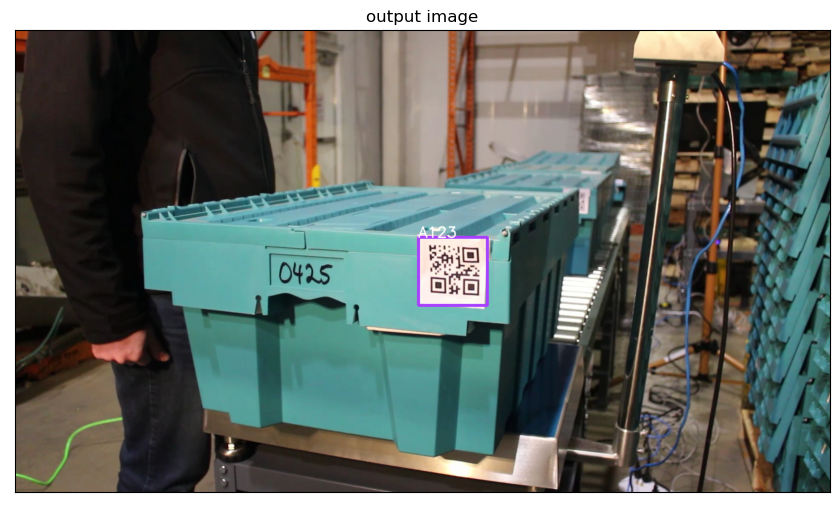

In [13]:
x, y = box[0][:][0][0], box[0][:][0][1]

qr_code = image[y:y+height, x:x+width]

value = cv2.QRCodeDetector().detectAndDecode(qr_code)[0]

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1.15
color = (255, 255, 255)
thickness = 2

image = cv2.putText(image, str(value), (x, y), font, fontScale, color, thickness, cv2.LINE_AA)

plt.figure(figsize=(13, 6))
graph(image,"output image")
plt.show()